# Lung dataset

The direct lung differentiation dataset from *Hurley, K. et al. 
Cell Stem Cell (2020) doi:10.1016/j.stem.2019.12.009*.

This dataset has multiple time points for the state manifold, but only one time point
for the clonal observation on day 27. 

In [1]:
import cospar as cs

In [2]:
cs.logging.print_version()
cs.settings.verbosity=3
cs.settings.data_path='lung_data_test_2' # A relative path to save data. If not existed before, create a new one.
cs.settings.figure_path='lung_figure_test_2' # A relative path to save figures. If not existed before, create a new one.
cs.settings.set_figure_params(format='png',dpi=75,fontsize=14) # use png to reduce file size. 

Running cospar 0.0.7 (python 3.6.12) on 2021-02-09 19:04.


## Load data

In [3]:
adata_orig=cs.datasets.lung()

  0%|          | 0.00/62.5M [00:00<?, ?B/s]

creating directory lung_data_test_2/ for saving data
creating directory lung_figure_test_2/ for saving figures
try downloading from url
https://kleintools.hms.harvard.edu/tools/downloads/cospar/Lung_pos17_21_D27_adata_preprocessed.h5ad
... this may take a while but only happens once


100%|██████████| 62.5M/62.5M [00:01<00:00, 44.6MB/s]


In [4]:
adata_orig

AnnData object with n_obs × n_vars = 15832 × 26766
    obs: 'state_info', 'time_info'
    uns: 'clonal_time_points', 'data_des'
    obsm: 'X_clone', 'X_emb', 'X_pca'

## Preprocessing (optional)

In [5]:
preprocessing=False
if preprocessing:
    cs.pp.get_highly_variable_genes(adata_orig,normalized_counts_per_cell=10000,min_counts=3, 
        min_cells=3, min_gene_vscore_pctl=80)

    cs.pp.remove_cell_cycle_correlated_genes(adata_orig,corr_threshold=0.03,confirm_change=False) # optional step
    cs.pp.get_X_pca(adata_orig,n_pca_comp=40) 
    #cs.pp.get_X_umap(adata_orig,n_neighbors=20,umap_min_dist=0.3) # we want to keep the original embedding
    #cs.pp.get_state_info(adata_orig,n_neighbors=20,resolution=0.5) # we want to keep the original state annotation

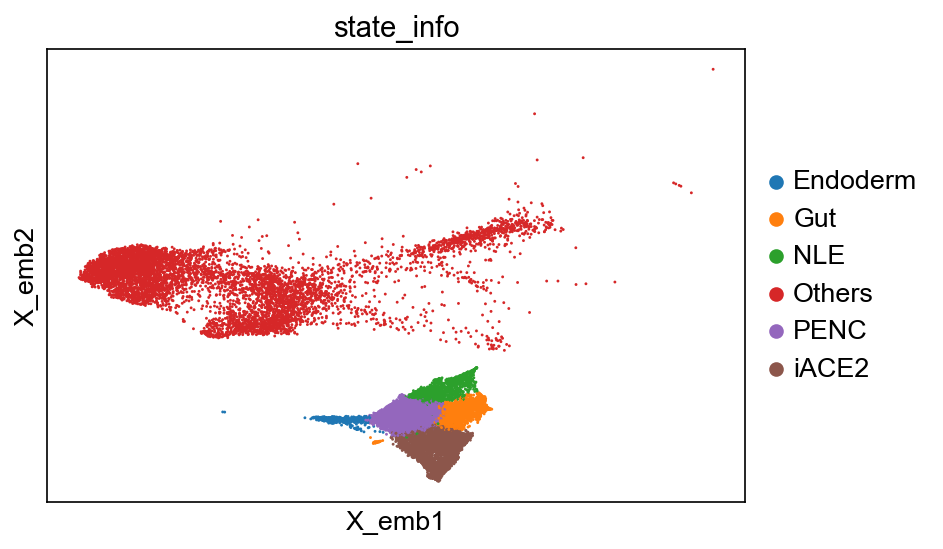

In [6]:
cs.pl.embedding(adata_orig,color='state_info')

In [7]:
cs.hf.check_available_choices(adata_orig)

Available transition maps: []
Availabel clusters: ['Others', 'iACE2', 'NLE', 'PENC', 'Endoderm', 'Gut']
Availabel time points: ['pos_21', 'D27', 'pos_17']
Clonal time points: ['D27']


### Raw clonal data analysis (without using state information)

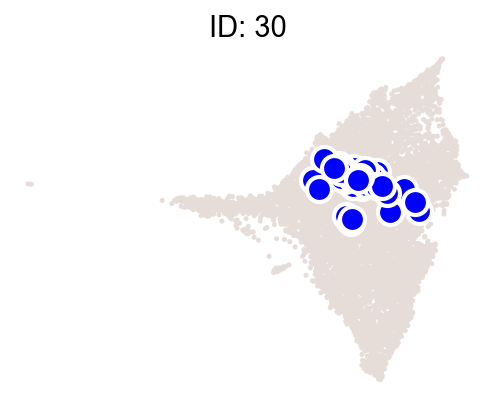

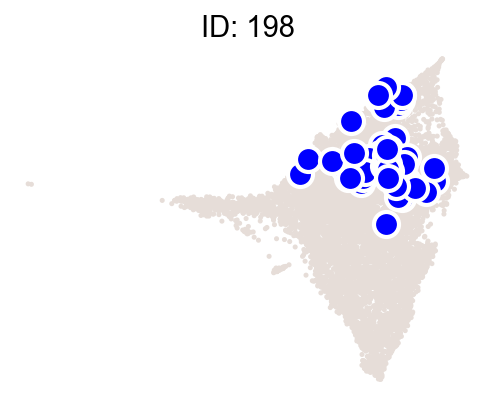

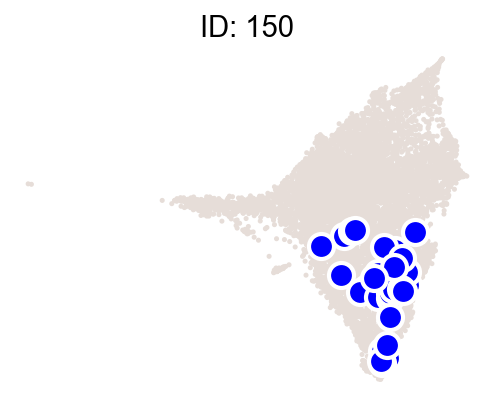

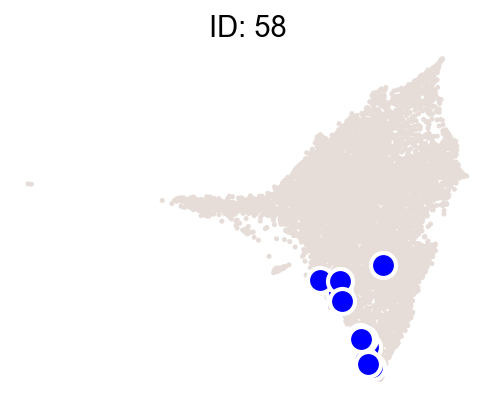

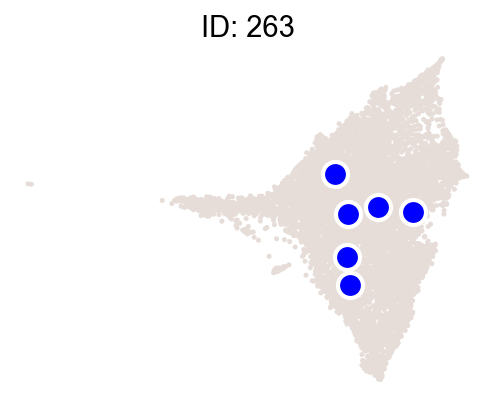

In [8]:
cs.pl.clones_on_manifold(adata_orig,selected_clone_list=[30,198,150,58,263],
            color_list=['blue','red'],selected_time_points=['D27'],point_size=2)

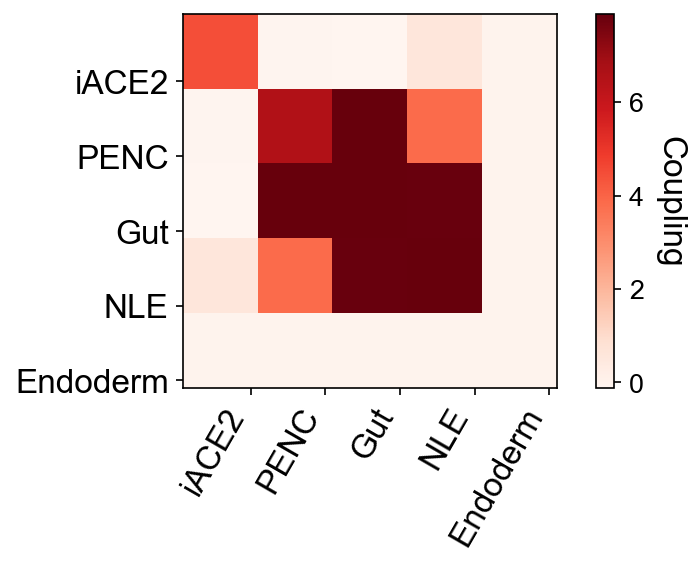

In [9]:
selected_time_point='D27'
cs.pl.fate_coupling_from_clones(adata_orig,selected_time_point,
            selected_fates=['iACE2', 'PENC', 'Gut', 'NLE', 'Endoderm'], color_bar=True)

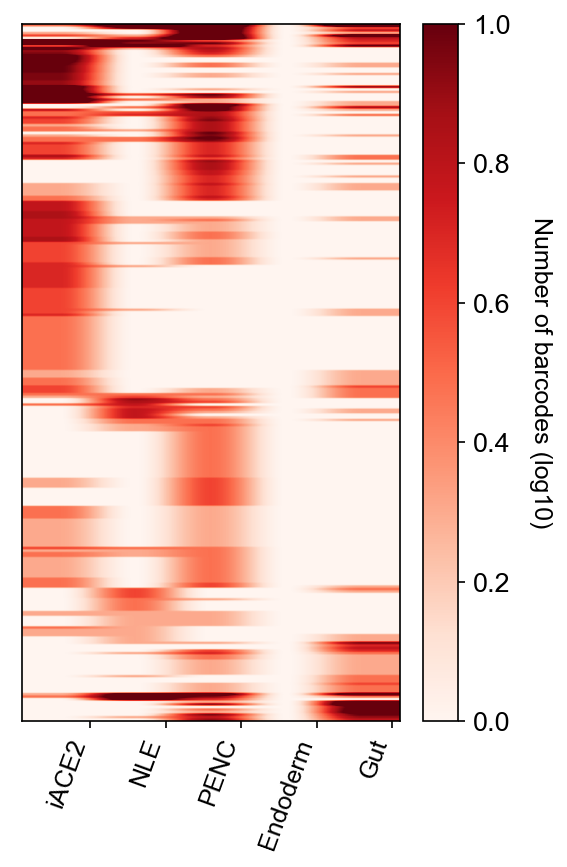

In [10]:
selected_time_point='D27'
cs.pl.barcode_heatmap(adata_orig,selected_time_point, color_bar=True)

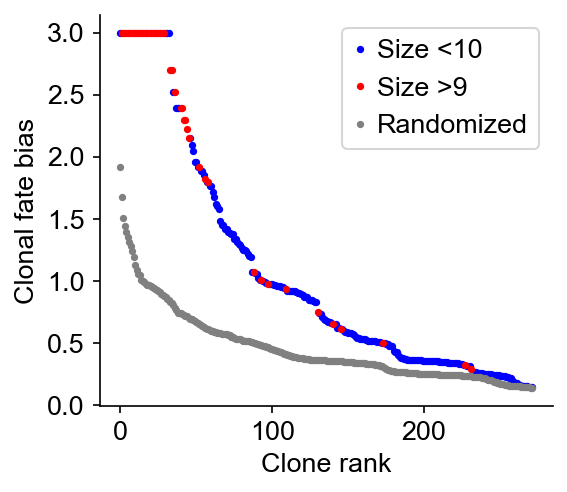

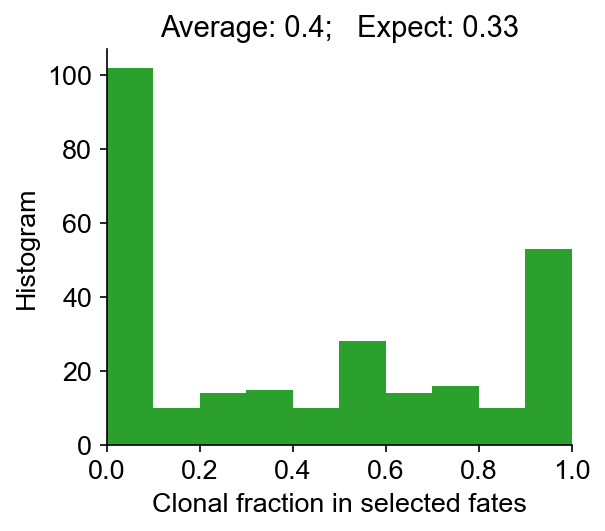

In [11]:
# This is very slow to run. You may skip. (to get more accurate results, set N_resampling=10000)
clonal_fate_bias,clone_id=cs.pl.clonal_fate_bias(adata_orig,selected_fate='iACE2',
            clone_size_thresh=10,N_resampling=1000,compute_new=False)

## Infer transition map using clones from the last time point

It takes around 9 minutes to run it for the first time (the data has ~15000 cells). Later runs take < 3 mins. 

-------------------------------New Start--------------------------------------------------
Current time point: pos_17
-----------Pre-processing and sub-sampling cells------------
Compute similarity matrix: computing new; beta=0.1
Smooth round: 1
--> Time elapsed: 0.0472261905670166
Smooth round: 2
--> Time elapsed: 0.3395230770111084
Smooth round: 3
--> Time elapsed: 2.321316957473755
--> Orignal sparsity=0.10625611684179591, Thresholding
--> Final sparsity=0.06359080221047629
similarity matrix truncated (Smooth round=3):  4.5784912109375
Smooth round: 4
--> Time elapsed: 4.774793863296509
--> Orignal sparsity=0.19565865491781953, Thresholding
--> Final sparsity=0.10602011255244238
similarity matrix truncated (Smooth round=4):  6.487684965133667
Smooth round: 5
--> Time elapsed: 6.284330129623413
--> Orignal sparsity=0.26021891990074664, Thresholding
--> Final sparsity=0.14820819224009757
similarity matrix truncated (Smooth round=5):  5.18575119972229
Save the matrix~~~
Smooth round: 6

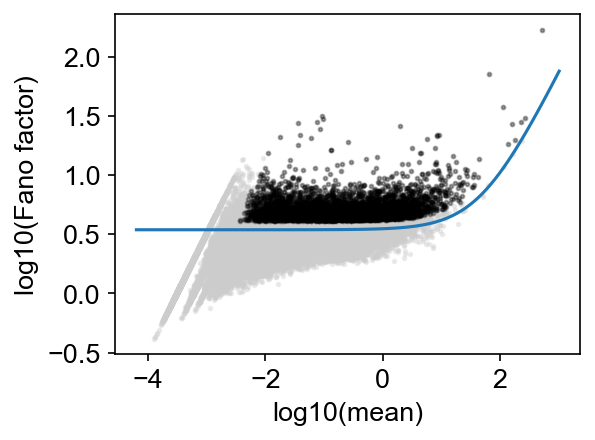

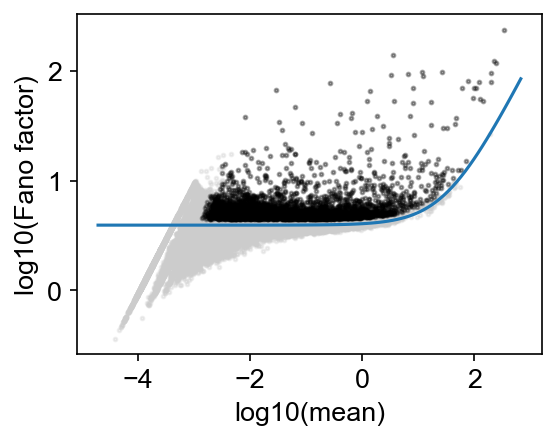

Highly varable gene number at t1 is 3689, Highly varable gene number at t2 is 3729
Common gene set is 1075
----------------
Step b: convert the shared highly variable genes into clonal info
No cells left for assignment, total used genes=851
----------------
Step c: compute the transition map based on clonal info from highly variable genes
---------Compute the transition map-----------
Compute similarity matrix: load existing data
--> Time elapsed:  0.29691505432128906
--> Time elapsed:  2.7558279037475586
--> Time elapsed:  0.18540501594543457
--> Time elapsed:  2.560216188430786
Compute similarity matrix: load existing data
--> Time elapsed:  0.23672795295715332
--> Time elapsed:  1.7196333408355713
--> Time elapsed:  0.19963407516479492
--> Time elapsed:  2.1012139320373535
Compute similarity matrix: load existing data
--> Time elapsed:  0.15925121307373047
--> Time elapsed:  2.2766659259796143
--> Time elapsed:  0.3380889892578125
--> Time elapsed:  1.0854458808898926
Current iterat

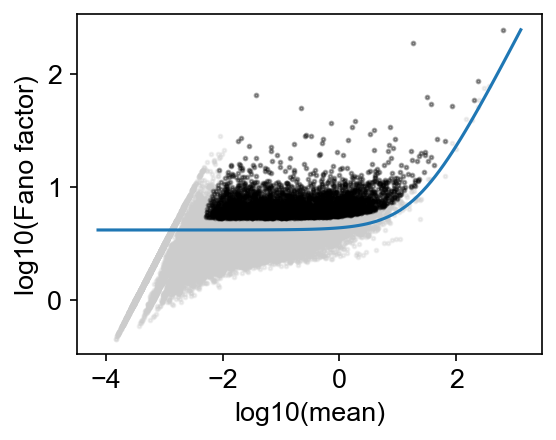

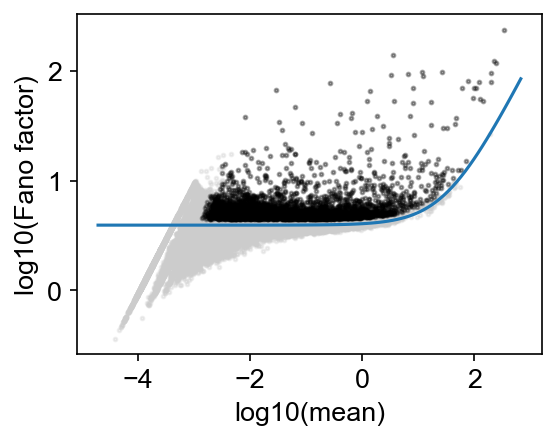

Highly varable gene number at t1 is 3794, Highly varable gene number at t2 is 3729
Common gene set is 1152
----------------
Step b: convert the shared highly variable genes into clonal info
No cells left for assignment, total used genes=1136
----------------
Step c: compute the transition map based on clonal info from highly variable genes
---------Compute the transition map-----------
Compute similarity matrix: load existing data
--> Time elapsed:  0.14574980735778809
--> Time elapsed:  1.5967421531677246
--> Time elapsed:  0.12334394454956055
--> Time elapsed:  1.4471712112426758
Compute similarity matrix: load existing data
--> Time elapsed:  0.11464405059814453
--> Time elapsed:  1.2609331607818604
--> Time elapsed:  0.08916783332824707
--> Time elapsed:  1.250248908996582
Compute similarity matrix: load existing data
--> Time elapsed:  0.12157678604125977
--> Time elapsed:  1.1028330326080322
--> Time elapsed:  0.11026191711425781
--> Time elapsed:  0.8104751110076904
Current iter

In [12]:
initial_time_points=['pos_17','pos_21']
clonal_time_point='D27'
adata=cs.tmap.infer_Tmap_from_one_time_clones(adata_orig,initial_time_points,clonal_time_point,use_full_Smatrix=True,
        initialize_method='HighVar',HighVar_gene_pctl=80,smooth_array=[20,15,10],noise_threshold=0.2)

### Save data or load 

In [13]:
save_data=False
if save_data:
    cs.hf.save_map(adata)
    
load_data=False
if load_data:
    ## updated Jan 27, 2021
    #data_des='paper_OneTimeClone_t*pos_17*pos_21*D27'
    data_des='CoSpar_OneTimeClone_t*pos_17*pos_21*D27' # computed on Jan 30, 2021
    adata=cs.hf.load_saved_adata_with_key(data_des)


### Plotting

#### Plot fate map

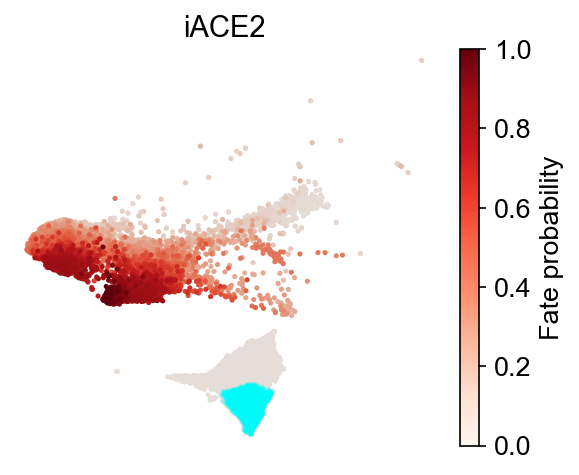

In [14]:
cs.pl.fate_map(adata,selected_fates=['iACE2'],selected_time_points=['pos_17','pos_21'],
               used_map_name='transition_map',map_backwards=True,plot_target_state=True)

#### Relative fate bias

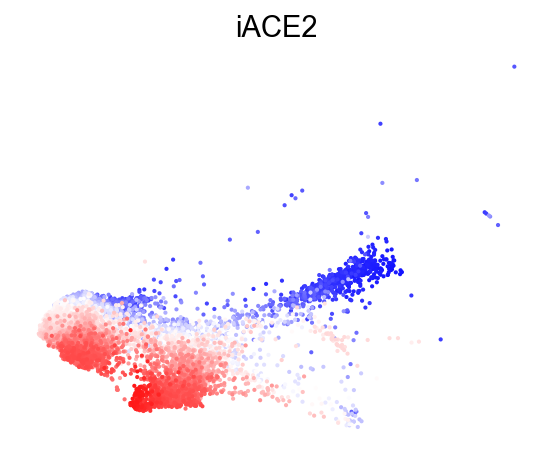

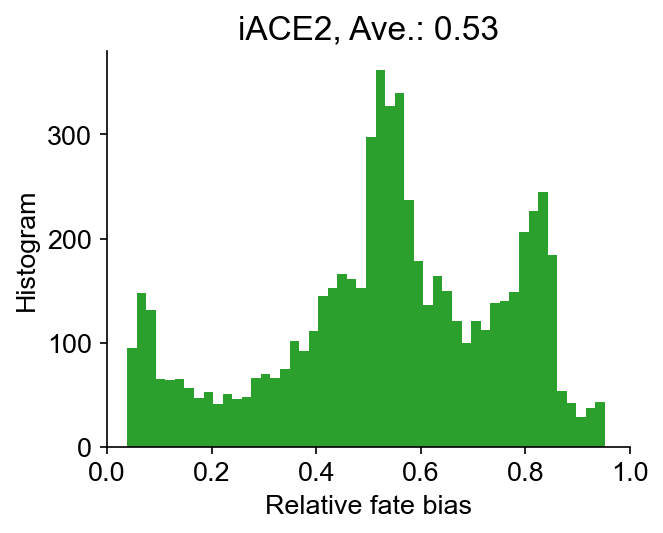

In [15]:
cs.pl.fate_bias_intrinsic(adata,selected_fates=['iACE2'],used_map_name='transition_map',
            selected_time_points=['pos_17','pos_21'],plot_target_state=False,map_backwards=True,color_bar=False,background=False)

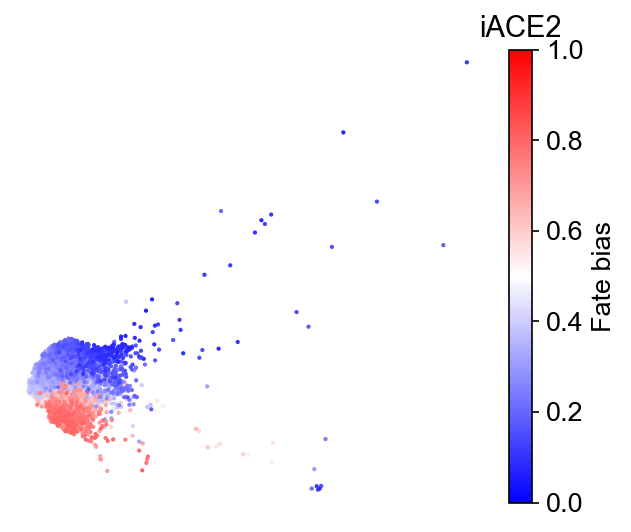

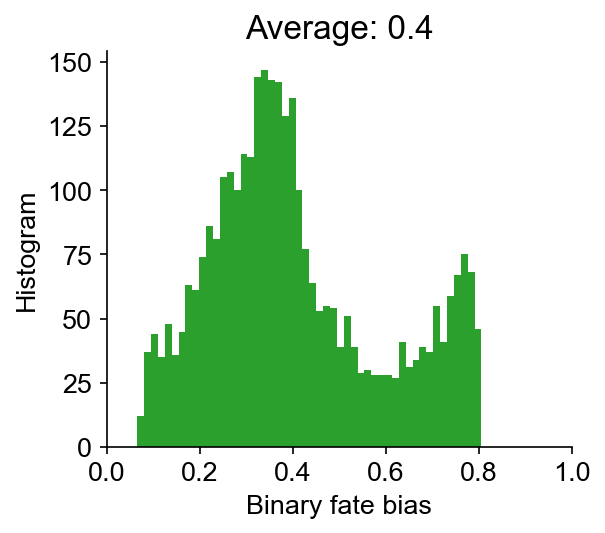

In [16]:
# This produces an average bias score that is close the the average clonal fate bias. 
selected_fates=['iACE2',['PENC', 'Gut', 'NLE', 'Endoderm']]
cs.pl.fate_bias_from_binary_competition(adata,selected_fates,used_map_name='transition_map',
            selected_time_points=['pos_17'],plot_target_state=False,map_backwards=True)

#### Dynamic trajectory inference on day 17

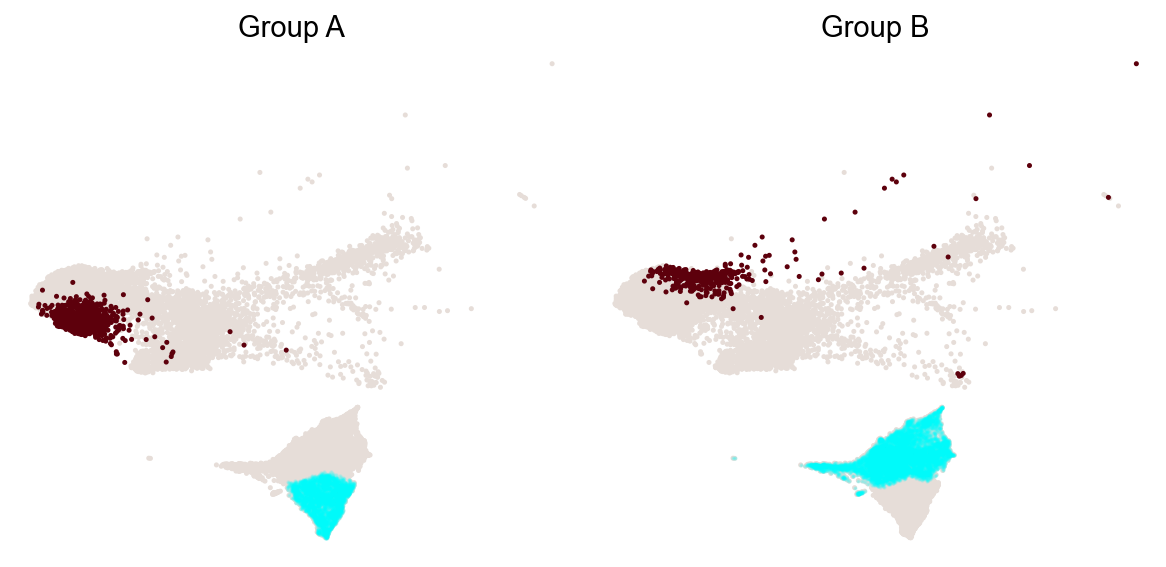

In [17]:
selected_fates=['iACE2',['PENC', 'Gut', 'NLE', 'Endoderm']]
cs.pl.dynamic_trajectory_from_intrinsic_bias(adata,selected_fates,
            used_map_name='transition_map',bias_threshold_A=0.7,bias_threshold_B=0.7,
                            selected_time_points=['pos_17'])

#### Differential genes for two ancestor groups on day 17

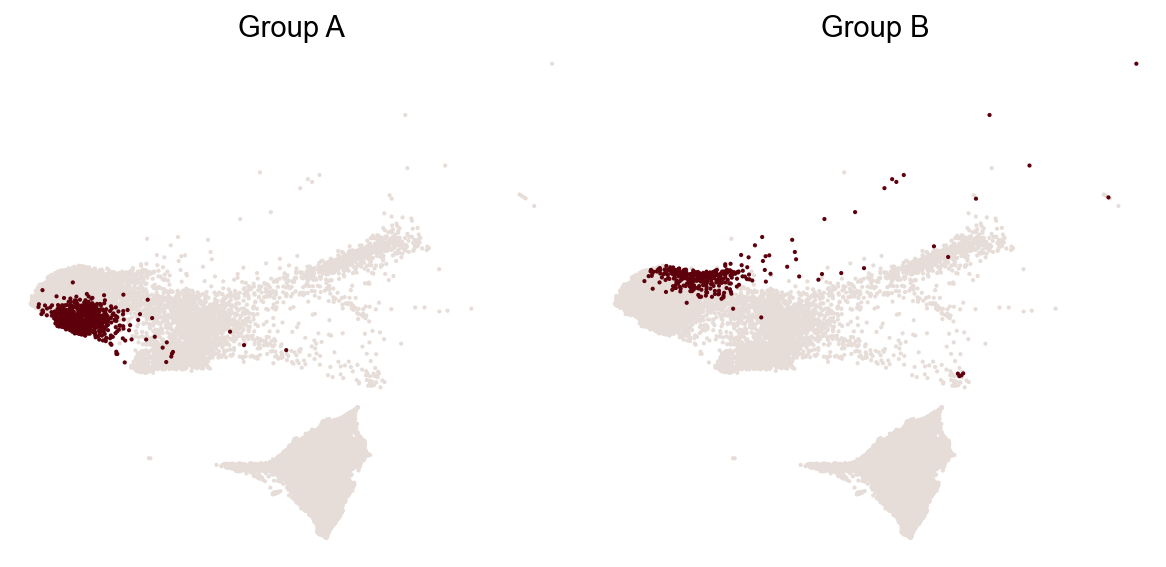

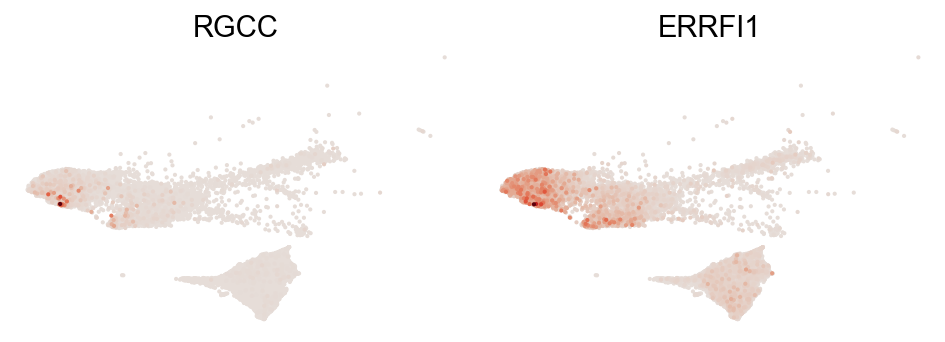

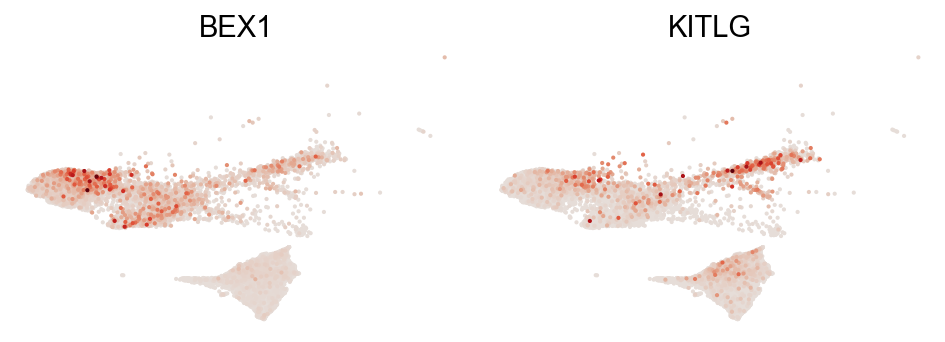

In [18]:
dge_gene_A, dge_gene_B=cs.pl.differential_genes(adata,plot_gene_N=2,gene_N=100)

In [19]:
dge_gene_A

gene            pv    mean_1     mean_2     ratio
225    RGCC  2.385363e-07  0.516128   4.353754 -1.820160
0    ERRFI1  1.819216e-77  4.772617  18.868851 -1.783211
110    KLF9  3.809360e-14  0.074725   2.650913 -1.764289
28     STOM  5.723646e-29  0.542995   4.004713 -1.697554
111    AQP3  5.064844e-14  0.043671   1.504599 -1.262912
..      ...           ...       ...        ...       ...
378  RNF145  1.506951e-04  0.507620   1.158090 -0.517482
652   ZADH2  8.800334e-03  0.261093   0.802966 -0.515697
317   ALDH2  3.303192e-05  1.010561   1.871094 -0.514002
401    XPR1  2.812946e-04  1.372163   2.381748 -0.511566
280  FNDC3B  7.389887e-06  2.147762   3.475198 -0.507625

[100 rows x 5 columns]

#### Dynamic trajectory on both day 17 and 21

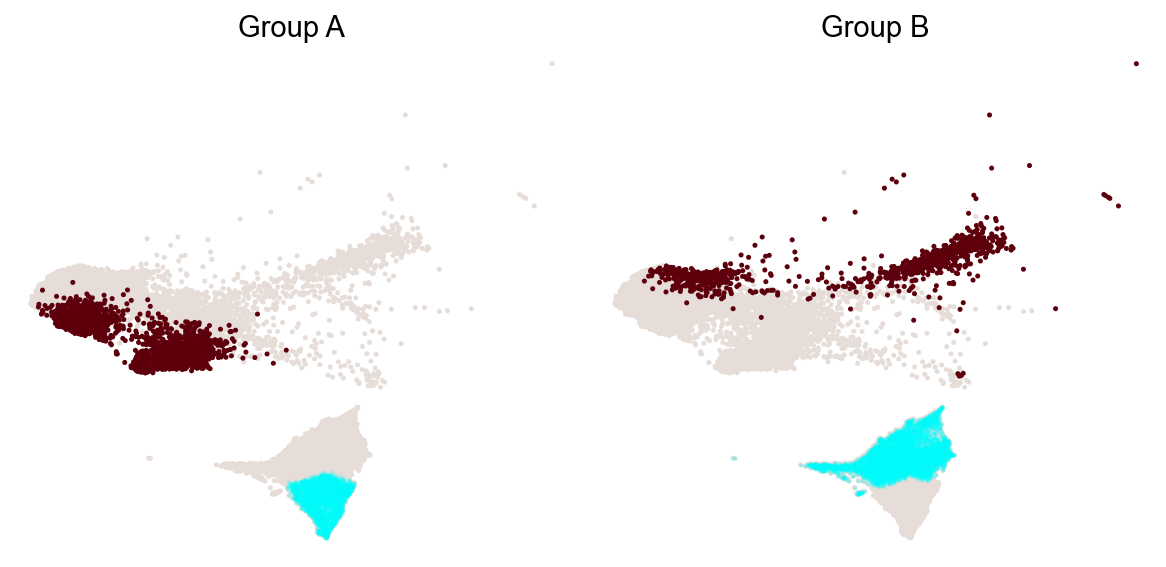

In [20]:
selected_fates=['iACE2',['PENC', 'Gut', 'NLE', 'Endoderm']]
cs.pl.dynamic_trajectory_from_intrinsic_bias(adata,selected_fates,
            used_map_name='transition_map',bias_threshold_A=0.7,bias_threshold_B=0.7,
                            selected_time_points=['pos_17','pos_21'])

#### Gene trend along the dynamic trajectory

The selected states, combined with the target states are stored as dynamic trajectory at adata.uns['dynamic_trajectory'].
We can plot gene trend along this trajectory

/Users/shouwenwang/miniconda3/envs/CoSpar_env/lib/python3.6/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 3.5 x 2.163 in image.
/Users/shouwenwang/miniconda3/envs/CoSpar_env/lib/python3.6/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: lung_figure_test_2/Lung_OneTimeClone_t*pos_17*pos_21*D27_fate_trajectory_pseutoTime_gene_expression_iACE2_True.png


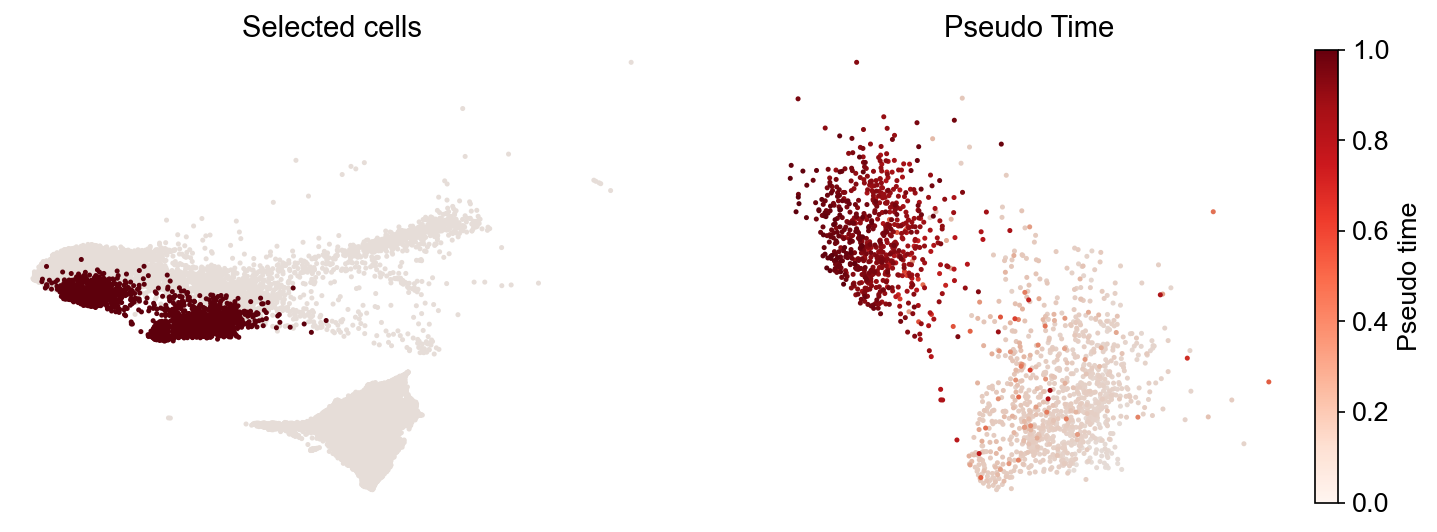

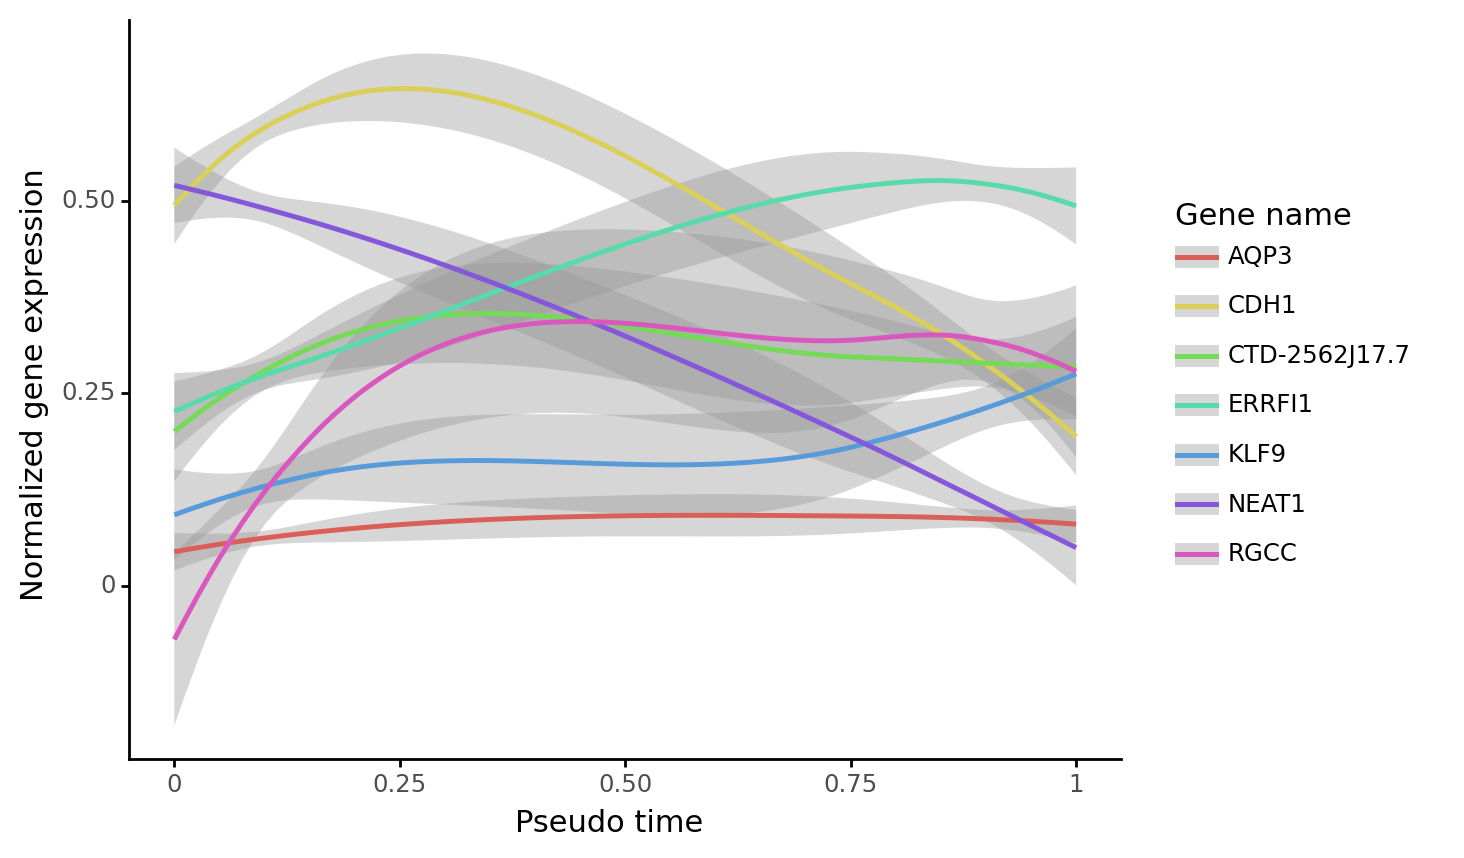

In [21]:
adata_selected=cs.pl.gene_expression_dynamics(adata,selected_fate='iACE2',include_target_states=False,
    gene_name_list=['NEAT1', 'RGCC', 'KLF9', 'ERRFI1', 'AQP3', 'CDH1', 'CTD-2562J17.7'])
